In [76]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy 
from scipy.stats import pearsonr
import sklearn 
from sklearn import datasets, linear_model 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [78]:
#Combain the data to the same DataFrame and show the head
data_df = pd.concat([x, y], axis=1)
print("numbers:", len(data_df))
data_df.head(100)

numbers: 6497


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [79]:
data_df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [80]:
missing_values = data_df.isnull().sum() # show null data
print(missing_values)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [82]:
data_df.describe() # describe

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


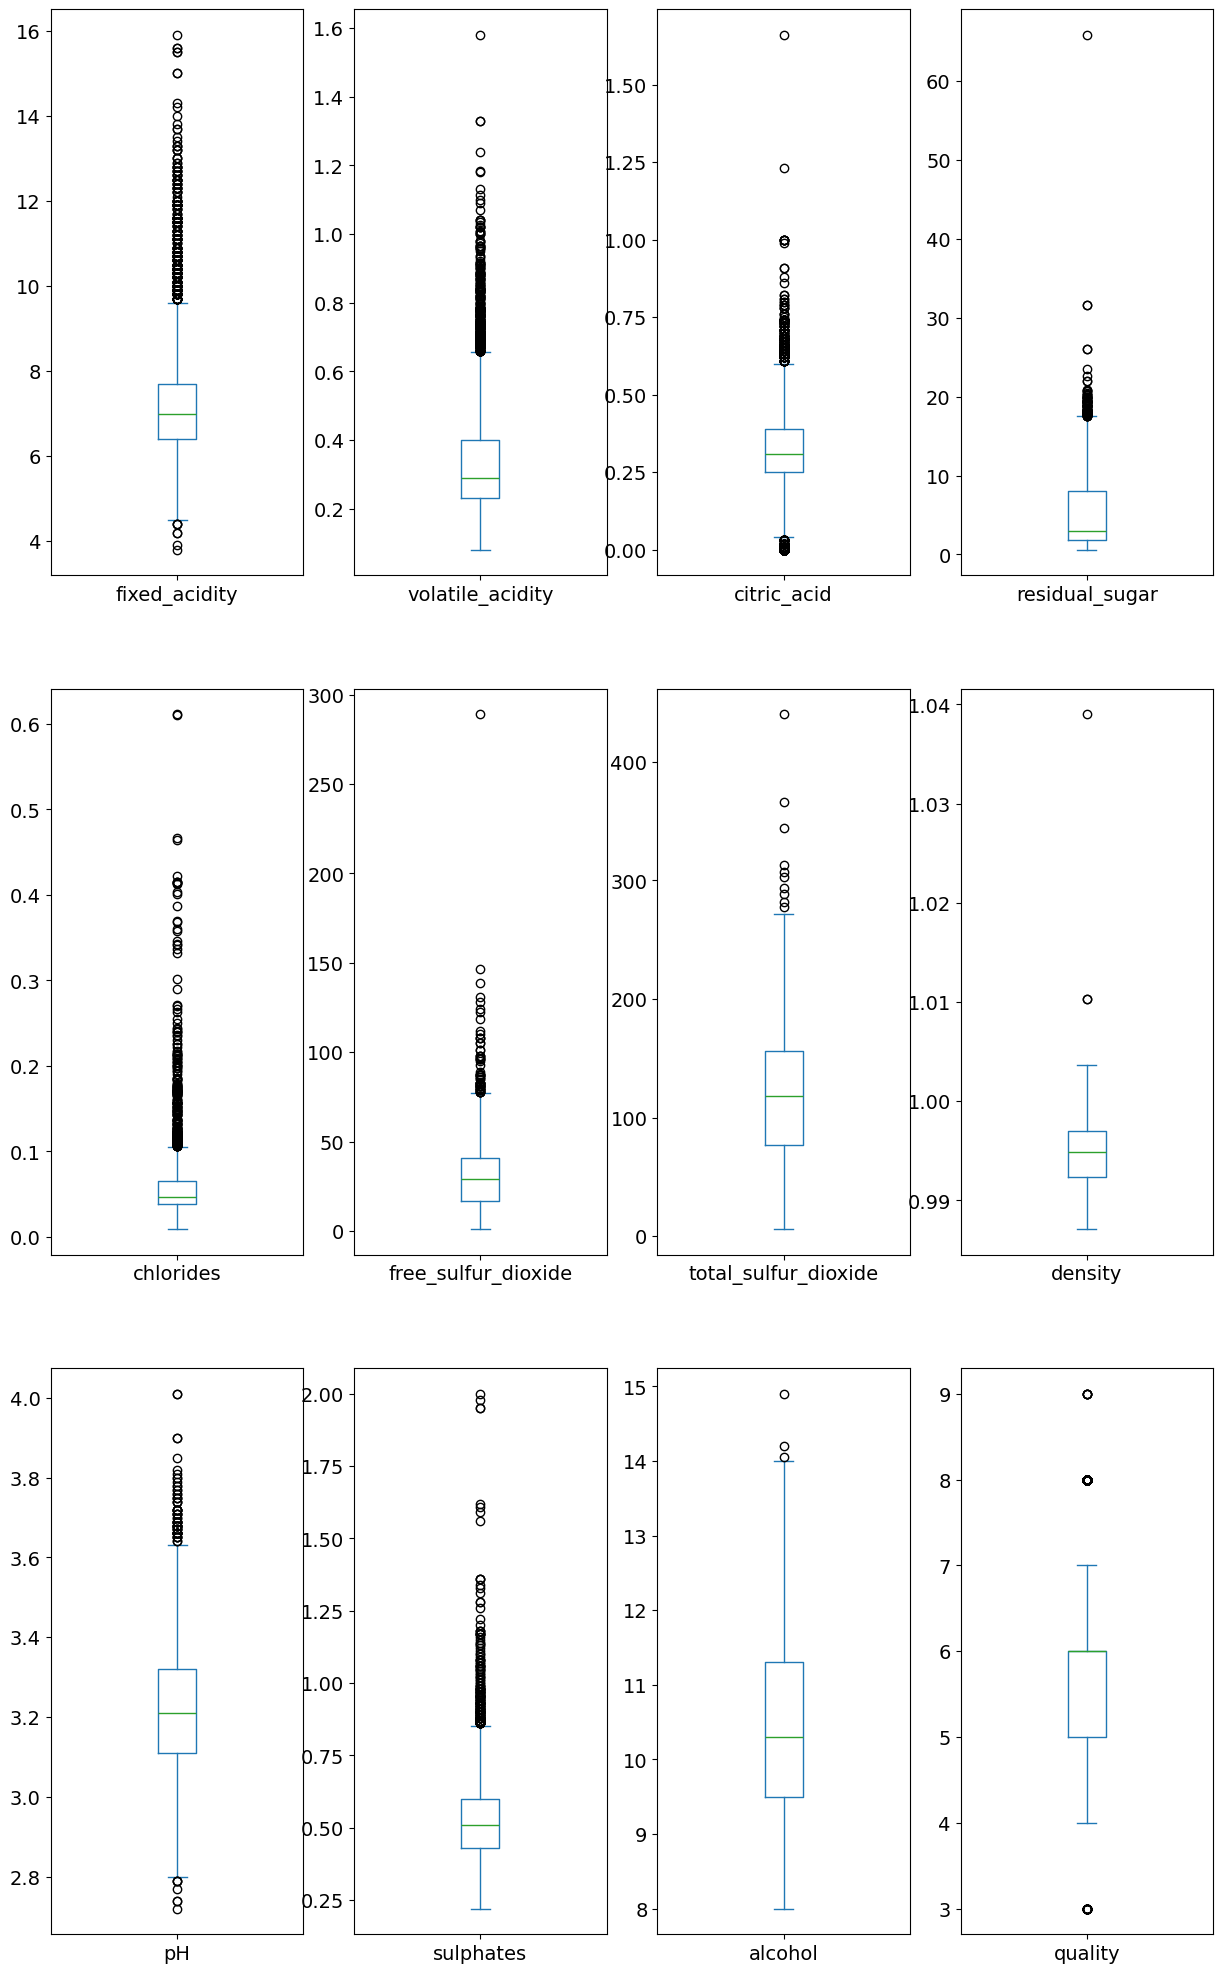

In [83]:
data_mean = data_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(3,4), sharex=False, 
sharey=False, fontsize=14, figsize=(15,25));

<Axes: >

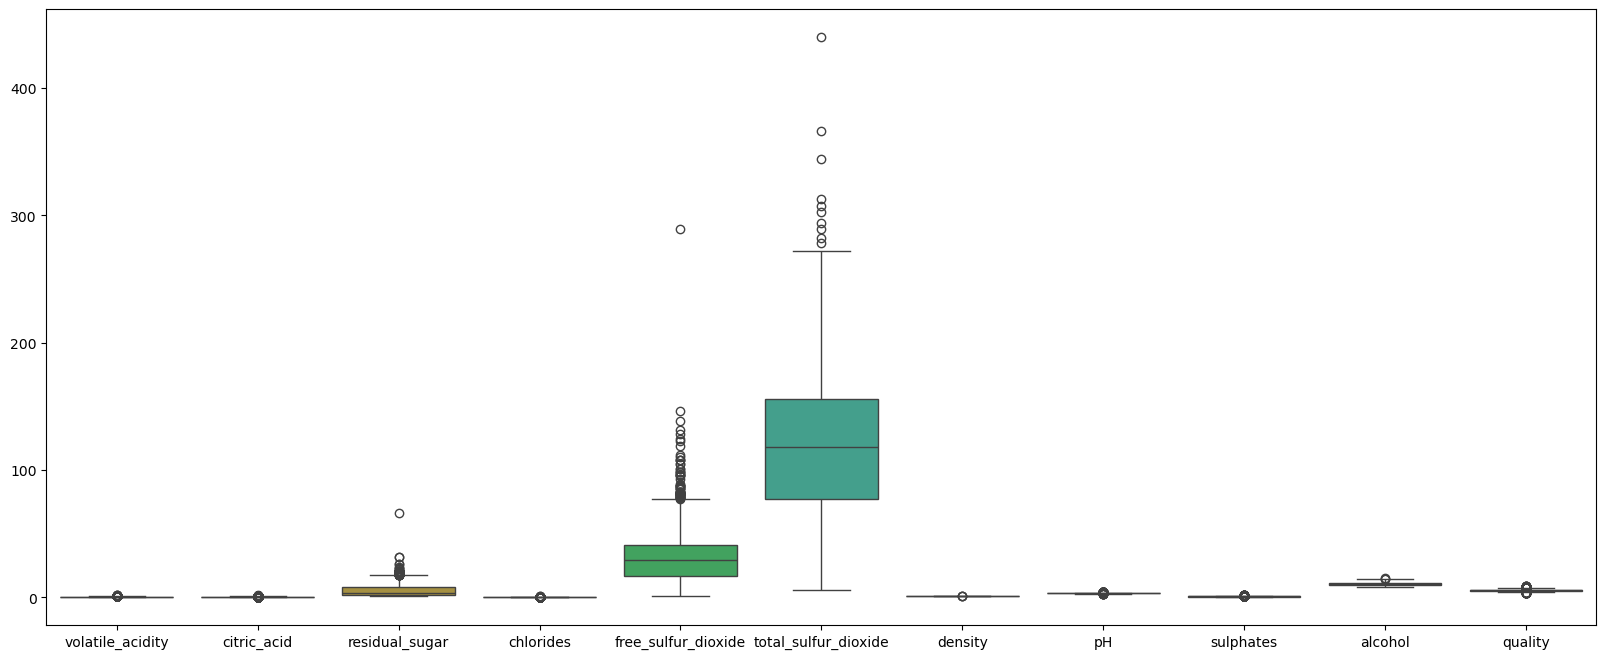

In [84]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=data_df.iloc[:, 1:13],ax=ax)

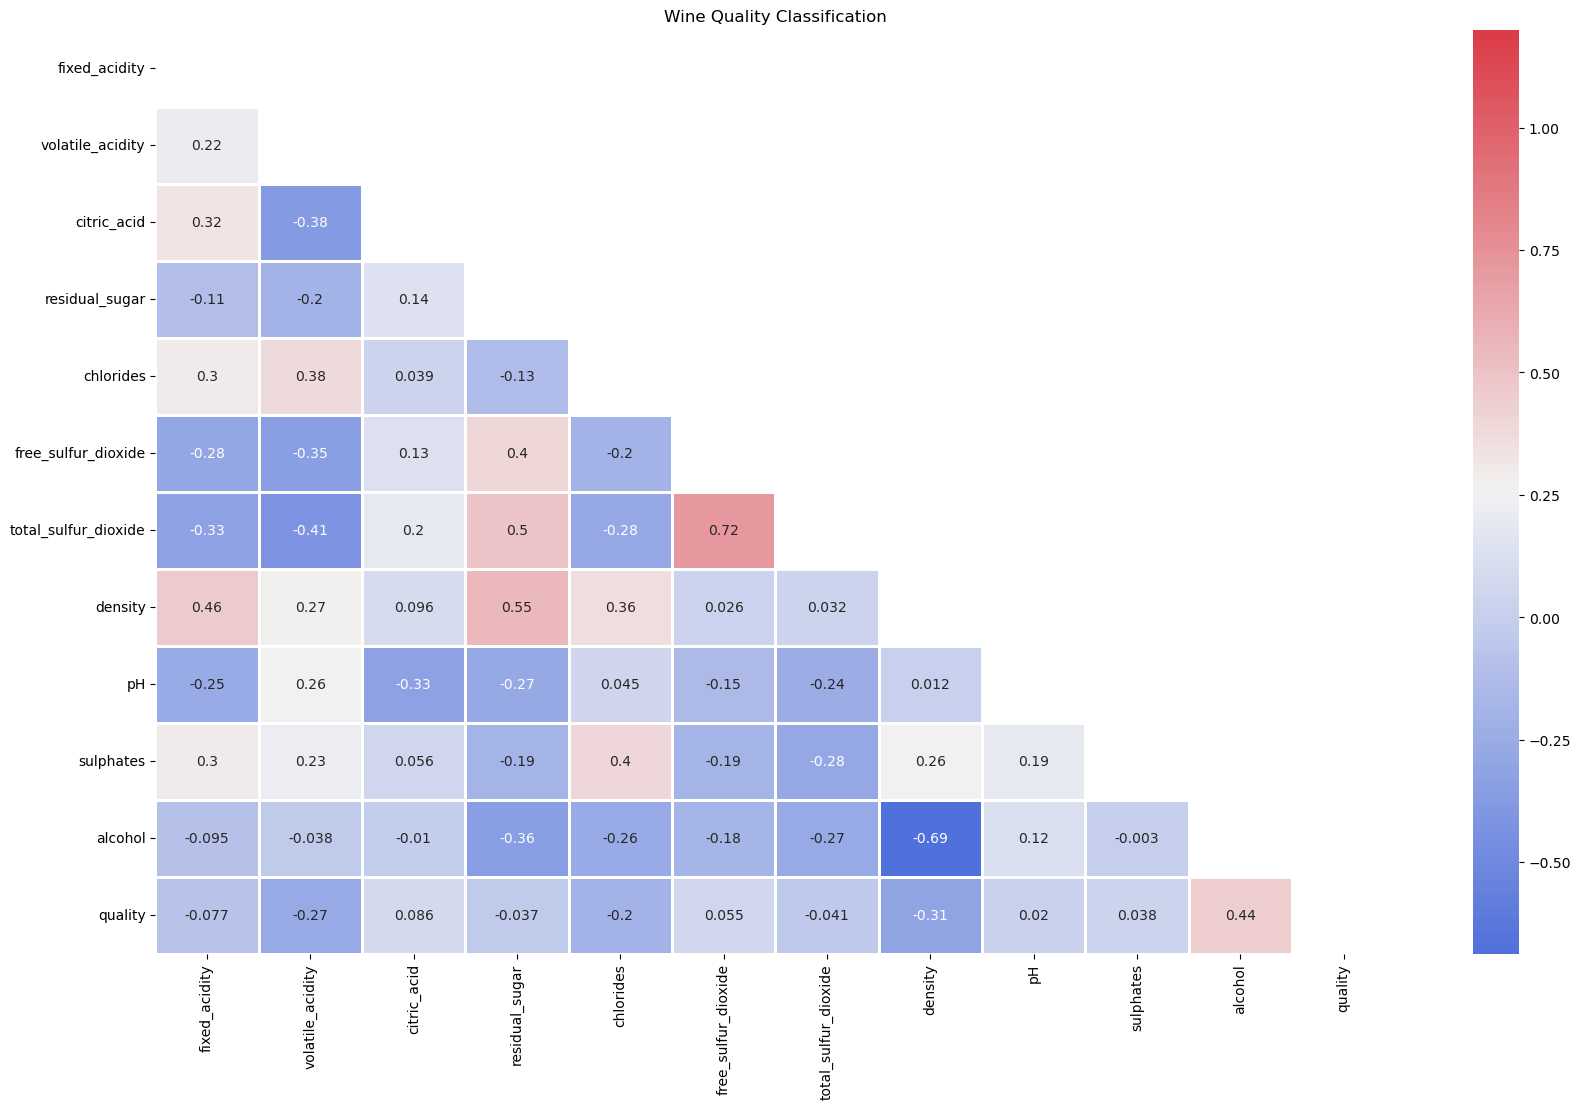

In [85]:
corrMatt = data_df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine Quality Classification')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [86]:
data_df = data_df.drop(columns=['density'])
data_df = data_df.drop(columns=['total_sulfur_dioxide']) # Reduce the strong importance of the columns

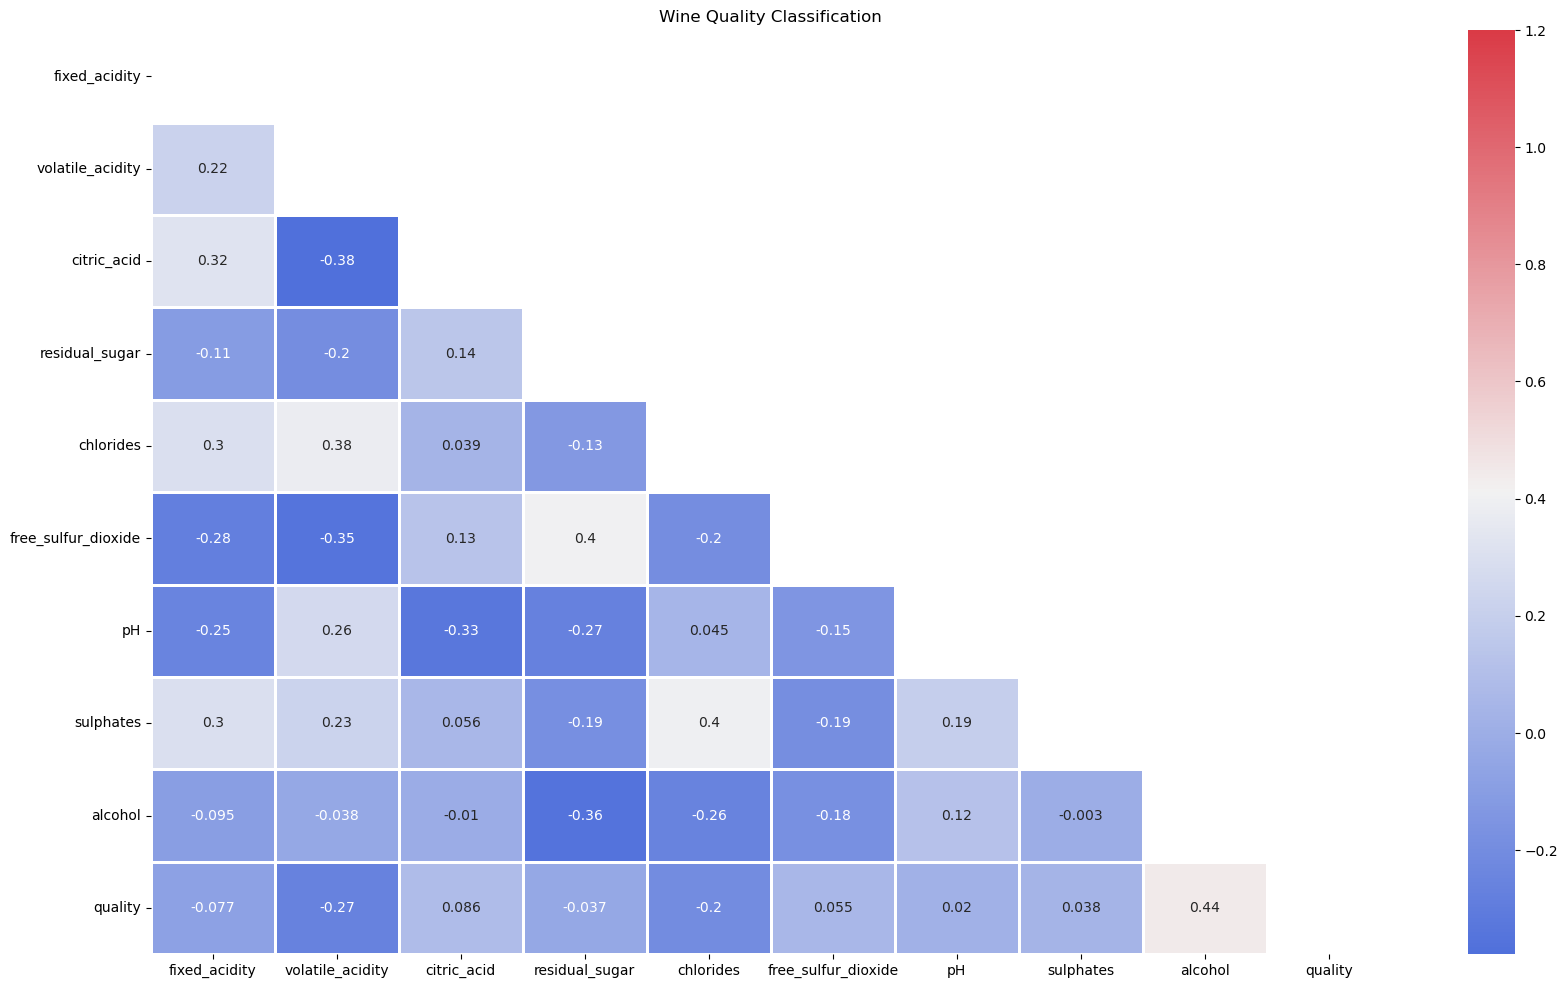

In [87]:
corrMatt = data_df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine Quality Classification')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

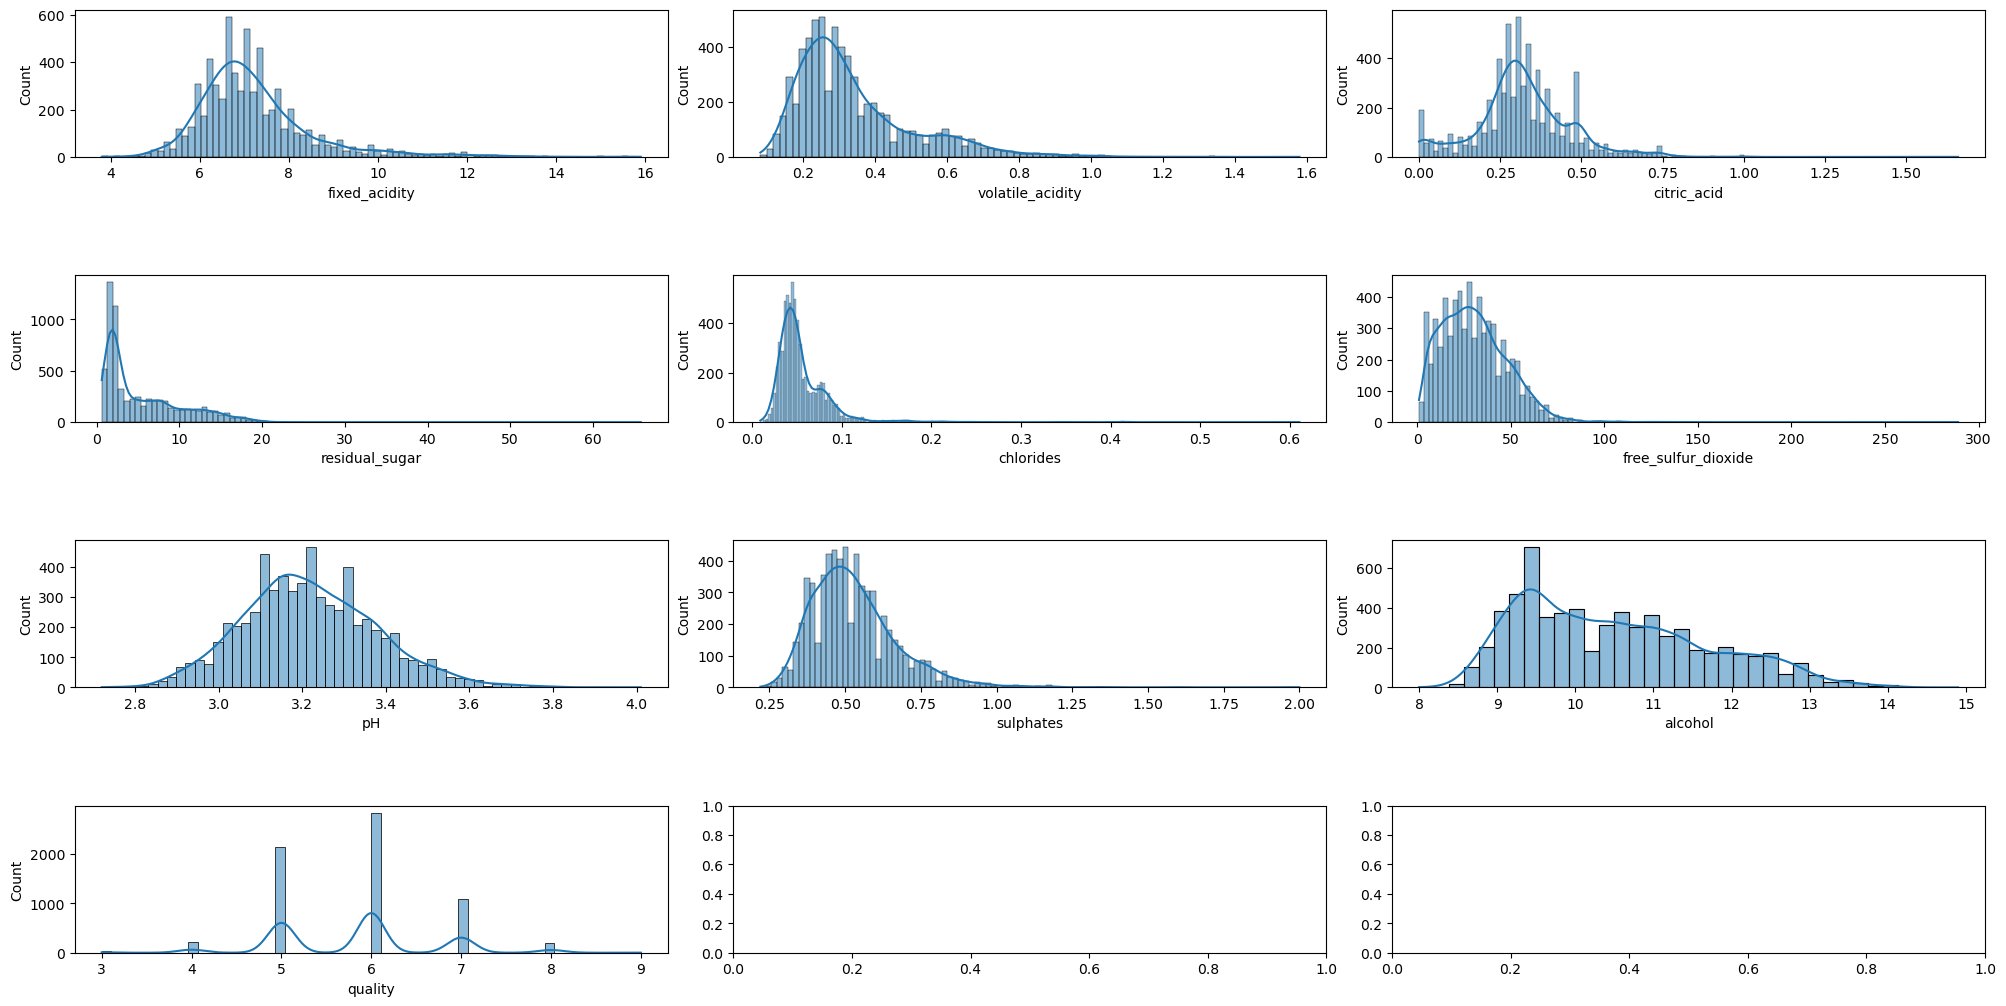

In [88]:
data_mean = data_df.iloc[:, :] 

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20, 10))
ax = ax.flatten()

index = 0
for col in data_mean.columns:
    sns.histplot(data_mean[col], kde=True, ax=ax[index]) 
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

<Axes: xlabel='free_sulfur_dioxide', ylabel='Count'>

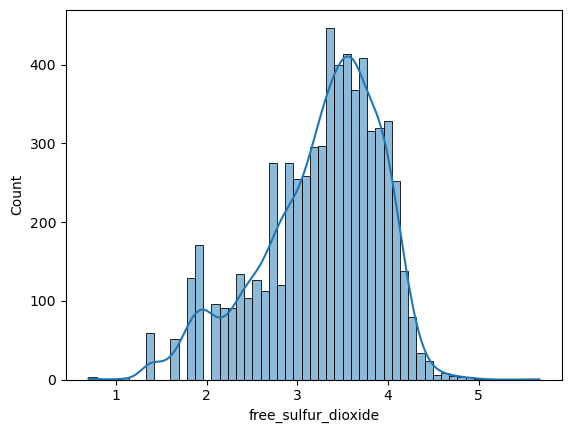

In [89]:
data_df['free_sulfur_dioxide'] = np.log(1 + data_df['free_sulfur_dioxide']) # For banning 0 in advance and using log function to get zt
sns.histplot(data_df['free_sulfur_dioxide'],kde=True) # Get a trend line

<Axes: xlabel='quality', ylabel='count'>

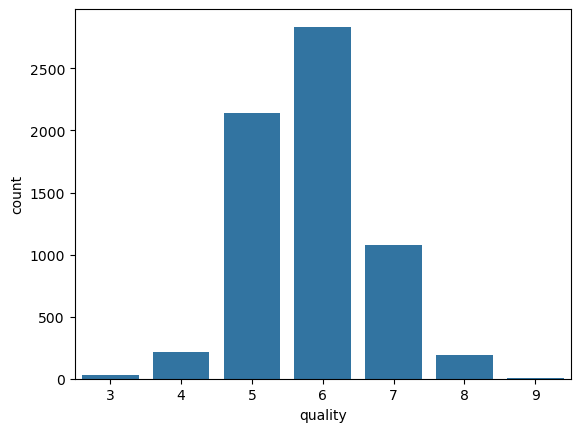

In [96]:
sns.countplot(x='quality', data=data_df)

In [106]:
from imblearn.over_sampling import SMOTE #conda install conda-forge::tpot-imblearn

In [107]:
oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [108]:
y.value_counts()

quality
3          2836
4          2836
5          2836
6          2836
7          2836
8          2836
9          2836
Name: count, dtype: int64

In [126]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split

ys = y.values.ravel()

def classify(model, x, ys):
    x_train, x_test, y_train, y_test = train_test_split(x, ys, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100, "%")

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = LogisticRegression()
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 41.607898448519045 %


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.2749937  0.30798288 0.33400504 0.30453401 0.32065491]
Average score and standard deviation: (30.84 +- 0.880)%


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [129]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = DecisionTreeClassifier()
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

Accuracy: 80.15313318557324 %
[0.72525812 0.75522538 0.7559194  0.76171285 0.79093199]
Average score and standard deviation: (75.78 +- 0.934)%


In [130]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = RandomForestClassifier()
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

Accuracy: 88.09187991134394 %
[0.78619995 0.82498111 0.82947103 0.8372796  0.85667506]
Average score and standard deviation: (82.69 +- 1.032)%


In [131]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = GaussianNB()
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

Accuracy: 43.28027402780577 %
[0.38126417 0.42054898 0.4395466  0.41511335 0.42166247]
Average score and standard deviation: (41.56 +- 0.852)%


In [132]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

Accuracy: 80.31432601249244 %
[0.7358348  0.76479476 0.77707809 0.78790932 0.83148615]
Average score and standard deviation: (77.94 +- 1.400)%


In [133]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',probability=True)
classify(model, x, ys)

# cross-validation
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',probability=True)
scores = cross_val_score(clf_cv, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

Accuracy: 81.70461414467056 %
[0.73533115 0.78393352 0.79496222 0.80881612 0.83350126]
Average score and standard deviation: (79.13 +- 1.454)%


In [136]:
from sklearn.neural_network import MLPClassifier

xs_train, xs_test, ys_train, ys_test = train_test_split(x, ys, test_size=0.25, random_state=42)
mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(xs_train, ys_train)
mlp_clf.predict_proba(xs_test)
classifier_score = mlp_clf.score(xs_test, ys_test)
print('The classifier accuracy score of MLP is {:03.2f}'.format(classifier_score))

The classifier accuracy score of MLP is 0.58
